In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
data_female = pd.read_csv("ANSUR_II_FEMALE_Public.csv")
data_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [4]:
data_male = pd.read_csv("ANSUR_II_MALE_Public.csv", encoding="latin-1")
data_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
# concat both dataframes

data = pd.concat([data_female, data_male])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


In [14]:
# preprocess
# data = data.loc[np.r_[0:25, 5001:5026], :]

# data["Height"] = data["Height"] * 2.54
# data["Weight"] = data["Weight"] / 2.205
data = data.replace(["Male", "Female"], [1, 0])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


(array([  7.,  18., 116., 273., 494., 475., 344., 175.,  68.,  16.]),
 array([1409., 1451., 1493., 1535., 1577., 1619., 1661., 1703., 1745.,
        1787., 1829.]),
 <BarContainer object of 10 artists>)

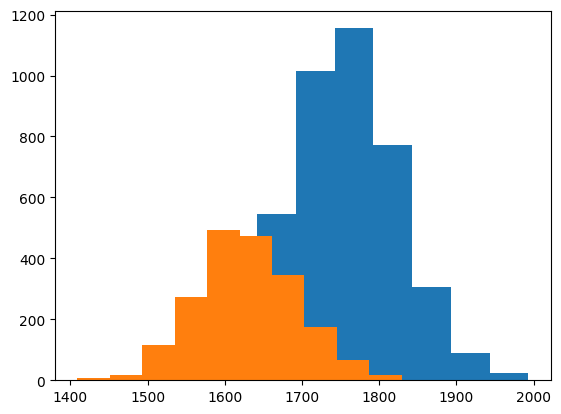

In [10]:
plt.hist(data.query("Gender=='Male'")["stature"])
plt.hist(data.query("Gender=='Female'")["stature"])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <a list of 10 Patch objects>)

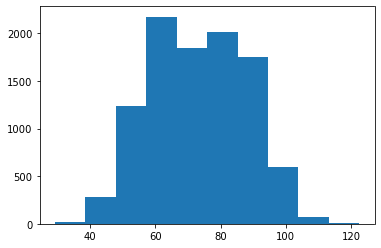

In [7]:
plt.hist(data["Weight"])

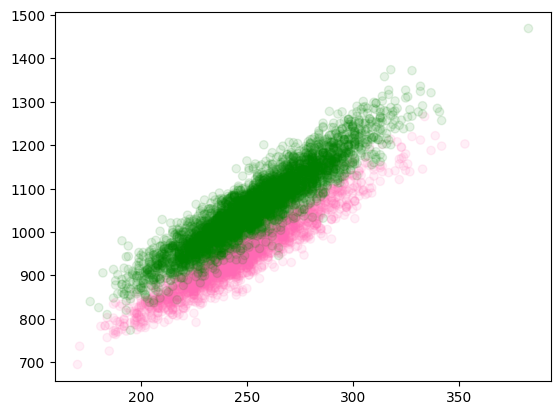

In [20]:
colors = ["hotpink", "green"]
plt.scatter(data["chestdepth"], data["chestcircumference"], c=data["Gender"], cmap=ListedColormap(colors), alpha=0.1)

In [9]:
X = np.array([data["Weight"], data["Height"]]).T
X.shape

Y = np.array(data["Gender"])
Y.shape

(10000,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01)

In [47]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
    
    # train
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    
    def euclidianDistance(self, a, b):
        d = np.sqrt(np.sum((a - b) ** 2))
        return d
        
    def nearNeighbors(self, X_test):
        dists = []
        for x_train in self.X_train:
            dist = self.euclidianDistance(x_train, X_test)
            dists.append(dist)
        
        index_sorted = np.argsort(dists)
        gender_sorted = self.Y_train[index_sorted]
        return gender_sorted[0: self.k]
        
    # test
    def predict(self, X_test):
        nearest_neighbors = self.nearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(nearest_neighbors))
        return Y_test
    
    def evaluate(self, X_test, y_test):
        counter = 0
        for i in tqdm(range(X_test.shape[0])):
            y_pred = self.predict(X_test[i])
            if y_pred == y_test[i]:
                counter += 1
        accuracy = counter / len(X_test) * 100
        return accuracy

In [48]:
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)

In [49]:
knn.evaluate(X_test, y_test)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.42it/s]


93.0

In [51]:
conf_mat = np.zeros((2, 2))

for i in range(X_test.shape[0]):
    y_pred = knn.predict(X_test[i])
    if y_test[i] == 0 and y_pred == 0:
        conf_mat[0, 0] += 1
    elif y_test[i] == 0 and y_pred == 1:
        conf_mat[0, 1] += 1
    elif y_test[i] == 1 and y_pred == 0:
        conf_mat[1, 0] += 1
    elif y_test[i] == 1 and y_pred == 1:
        conf_mat[1, 1] += 1

conf_mat

array([[43.,  5.],
       [ 2., 50.]])

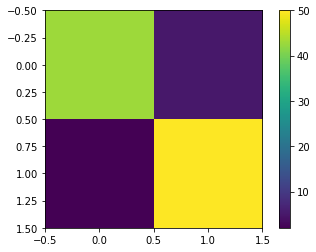

In [53]:
plt.imshow(conf_mat)
plt.colorbar()

In [ ]:
X_test = np.array([102, 185])
answer = knn.predict(X_test)
answer